<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import json
import pandas as pd
import seaborn as sns
from datetime import datetime as dt

## DF1

In [2]:
filename = 'matches.json'

In [3]:
matches = []
with open(filename) as f:
    for line in f:
        matches.append(line)
print(matches[0])

{"_id":"51aa13bc-e948-45c8","is_canceled":false,"created_at":"2021-11-30 14:32:33.347 UTC","start_date":"2021-12-01 10:00:00 UTC","end_date":"2021-12-01 11:00:00 UTC","owner_id":"AKACGCP","sport_id":"PADEL","club_info":[{"club_id":"a328d271-7036-47b4","club_name":"World of Padel","coordinate_geo":{"type":"Point","coordinates":[9.17116514,56.12043582]},"city":"Ikast","country":"Danmark","court_id":"178252b1-8ddb-4958","court_properties":{"resource_type":"indoor","resource_size":"double","resource_feature":"panoramic"}},{"club_id":"a328d271-7036-47b4","club_name":"World of Padel","coordinate_geo":{"type":"Point","coordinates":[9.17116514,56.12043582]},"city":"Ikast","country":"Danmark","court_id":"178252b1-8ddb-4958","court_properties":{"resource_type":"indoor","resource_size":"double","resource_feature":"panoramic"}},{"club_id":"a328d271-7036-47b4","club_name":"World of Padel","coordinate_geo":{"type":"Point","coordinates":[9.17116514,56.12043582]},"city":"Ikast","country":"Danmark","co

In [4]:
matches = []
with open(filename) as f:
    for line in f:
        try:
            m = json.loads(line)
            mm = {
                'reservation_id': m['_id'],
                'is_cancelled': m['is_canceled'],
                'created_at': m['created_at'],
                'start_date': m['start_date'],
                'end_date': m['end_date'],
                'user_id': m['owner_id'],
                'sport_id': m['sport_id'],
                'club_id': m['club_info'][0]['club_id'],
                'club_name': m['club_info'][1]['club_name'],
                'city': m['club_info'][0]['city'],
                'country': m['club_info'][0]['country'],
                'num_players': len(m['registered_users']),
                'price':m['registered_users'][0]['price']['amount'],
                'currency':m['registered_users'][0]['price']['currency'],
                'payment_method':m['registered_users'][0]['payment_method'],
                'registration date':m['registered_users'][1]['registration_date'],
                'court id': m['club_info'][0]['court_id'],

                
             }
            matches.append(mm)
        except:
            continue

In [5]:
print(matches[0])

{'reservation_id': '51aa13bc-e948-45c8', 'is_cancelled': False, 'created_at': '2021-11-30 14:32:33.347 UTC', 'start_date': '2021-12-01 10:00:00 UTC', 'end_date': '2021-12-01 11:00:00 UTC', 'user_id': 'AKACGCP', 'sport_id': 'PADEL', 'club_id': 'a328d271-7036-47b4', 'club_name': 'World of Padel', 'city': 'Ikast', 'country': 'Danmark', 'num_players': 4, 'price': '0.5', 'currency': 'DKK', 'payment_method': 'WALLET', 'registration date': '2021-11-30 14:33:33.347 UTC', 'court id': '178252b1-8ddb-4958'}


In [6]:
df = pd.DataFrame(matches)

In [7]:
df

,reservation_id,is_cancelled,created_at,start_date,end_date,user_id,sport_id,club_id,club_name,city,country,num_players,price,currency,payment_method,registration date,court id
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00 UTC,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00 UTC,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00 UTC,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00 UTC,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,DIRECT,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00 UTC,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75613,dc89385d-da5f-439c,False,2021-11-20 13:38:09.927 UTC,2021-11-20 20:00:00 UTC,2021-11-20 22:00:00 UTC,AAKIPEC,PADEL,cc3b6516-7bfc-4504,Padel Box,Odense C,Denmark,4,560,DKK,APPLE_PAY,2021-11-20 13:44:00.641 UTC,03c56634-1c24-4814
75614,aa4884bd-69a1-4d5e,False,2021-12-10 14:30:49.848 UTC,2021-12-10 16:00:00 UTC,2021-12-10 18:00:00 UTC,AGIAGRN,PADEL,cc3b6516-7bfc-4504,Padel Box,Odense C,Denmark,4,560,DKK,APPLE_PAY,2021-12-10 14:31:49.848 UTC,03c56634-1c24-4814
75615,573c5587-245d-4368,True,2021-11-10 17:16:33.11 UTC,2021-11-24 19:00:00 UTC,2021-11-24 21:00:00 UTC,ARACRIP,PADEL,cc3b6516-7bfc-4504,Padel Box,Odense C,Denmark,4,560,DKK,WALLET,2021-11-10 17:17:33.11 UTC,03c56634-1c24-4814
75616,50206e71-a174-47ad,False,2021-11-17 14:39:24.93 UTC,2021-11-21 13:00:00 UTC,2021-11-21 15:00:00 UTC,PPMPMI,PADEL,cc3b6516-7bfc-4504,Padel Box,Odense C,Denmark,4,560,DKK,WALLET,2021-11-17 14:40:24.93 UTC,03c56634-1c24-4814


In [8]:
df["start_date"]= pd.to_datetime(df["start_date"], errors= "coerce")

In [9]:
df["start_date_str"] = df["start_date"].dt.strftime("%d/%m/%Y")

In [10]:
df["start_date_months"] = df["start_date"].dt.strftime("%B")

In [11]:
df.head()

,reservation_id,is_cancelled,created_at,start_date,end_date,user_id,sport_id,club_id,club_name,city,country,num_players,price,currency,payment_method,registration date,court id,start_date_str,start_date_months
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00+00:00,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958,01/12/2021,December
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00+00:00,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958,30/11/2021,November
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00+00:00,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016,30/11/2021,November
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00+00:00,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,DIRECT,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b,01/12/2021,December
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00+00:00,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,Ikast,Danmark,4,0.5,DKK,WALLET,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b,30/11/2021,November


## DF2

In [12]:
df_club=pd.read_csv("C:/Users/ro9387/OneDrive - International Flavors & Fragrances Inc/Desktop/Notebook/PowerBI/Playtomic/data_analyst_skills_test_/data_analyst_skills_test/club.csv")
df_club.head()

,id,country,name,zone_id,saas,status
0,875d32df-3dea-4cf4,Italy,Padel Elite Top Club,Europe/Rome,ANEMONE,ACTIVE
1,875d33df-3dea-4df4,Italy,Padel Center,Europe/Rome,ANEMONE,ACTIVE
2,da7cb23b-43b3-11e8,Spain,Europadel,Europe/Madrid,ANEMONE,ACTIVE
3,da7cb22b-43b3-11e8,Spain,Centro Padel,Europe/Madrid,ANEMONE,ACTIVE
4,da76cbee-43b3-11e8,Spain,Padel Indoor,Europe/Madrid,SYLTEKCRM,ACTIVE


In [13]:
df_club.columns

Index(['id', 'country', 'name', 'zone_id', 'saas', 'status'], dtype='object')

## DF3

In [14]:
df_matches_history= pd.read_json('matches_history.json', lines=True)
df_matches_history.head()

,_id,created_at,match_id,event_type,requester_id,cancel_reason
0,bb0e87f8-6bdd-40aa,2022-01-19 15:48:34.356000+00:00,4d9d45b4-3c60-49d9,MATCH_CREATED,CNG,NaN
1,2be0c62f-e8e6-42b6,2021-11-29 21:14:07.723000+00:00,0a2fc77d-1a44-4069,MATCH_CREATED,CRI,NaN
2,46d38526-2717-410c,2021-11-09 22:46:00.844000+00:00,ef2cedf0-78a9-49ef,MATCH_CREATED,ENG,NaN
3,ebf3c825-48fa-48dc,2021-12-12 19:39:46.092000+00:00,d2c1bb71-d1bd-4185,MATCH_CREATED,ENK,NaN
4,3f7a64c2-f30b-41d4,2021-12-01 20:55:08.418000+00:00,25552e57-dc68-4e5c,MATCH_CREATED,ENK,NaN


In [50]:
df_matches_history["event_type"].unique()

array(['MATCH_CREATED', 'MATCH_PUBLISHED', 'MATCH_CANCELED'], dtype=object)

In [53]:
df_matches_history[df_matches_history.event_type == 'MATCH_PUBLISHED']

,_id,created_at,match_id,event_type,requester_id,cancel_reason
30,082fe695-d419-42e0,2021-12-23 08:33:57.553000+00:00,46a06093-73bc-4b6b,MATCH_PUBLISHED,ARMK,NaN
34,628055ca-3fd0-4273,2022-01-04 23:55:14.356000+00:00,aceeba82-ee7d-4716,MATCH_PUBLISHED,ARMK,NaN
36,2024f9f9-c163-45e5,2022-01-04 09:20:18.289000+00:00,4efa8baa-5641-4b33,MATCH_PUBLISHED,ARMK,NaN
117,a6f08f7f-6cbc-4602,2021-11-30 15:06:33.351000+00:00,a376da32-0726-4246,MATCH_PUBLISHED,AEEAG,NaN
118,50c9ae9a-ad30-424d,2021-11-24 15:13:38.646000+00:00,d8690760-b32a-440c,MATCH_PUBLISHED,AEEAG,NaN
1666,1c53dc2d-1f57-4048,2021-12-26 19:14:49.349000+00:00,a2179f62-bc67-4d7b,MATCH_PUBLISHED,EAIRM,NaN
2133,2c2931cc-0b2a-4fd1,2021-12-26 11:21:48.858000+00:00,628e97d0-1e7f-4630,MATCH_PUBLISHED,EGAKR,NaN
5508,977ddd21-fe91-49f3,2021-12-25 15:22:39.480000+00:00,36070820-df2d-47d0,MATCH_PUBLISHED,IIAKE,NaN
5516,509cb25a-a82a-4f7b,2021-12-25 15:18:51.335000+00:00,a0eccb6c-bce0-4bbc,MATCH_PUBLISHED,IIAKE,NaN
6271,578e4111-39d6-40d4,2022-01-20 07:23:03.456000+00:00,c77e00db-3cf8-476c,MATCH_PUBLISHED,KCMEA,NaN


## Merge1


In [15]:
df_status=pd.merge(df,df_club, how= "left",left_on= "club_id", right_on="id")

In [16]:
df_status.columns

Index(['reservation_id', 'is_cancelled', 'created_at', 'start_date',
       'end_date', 'user_id', 'sport_id', 'club_id', 'club_name', 'city',
       'country_x', 'num_players', 'price', 'currency', 'payment_method',
       'registration date', 'court id', 'start_date_str', 'start_date_months',
       'id', 'country_y', 'name', 'zone_id', 'saas', 'status'],
      dtype='object')

In [17]:
filter_list=['reservation_id', 'is_cancelled', 'created_at', 'start_date', 'start_date_months',
       'end_date', 'user_id', 'sport_id', 'club_id', 'club_name', 'city',
       'country_x', 'num_players', 'price', 'currency', 'payment_method','status','registration date', 'court id']

In [18]:
df_status=df_status[filter_list]

In [19]:
df_status.shape

(75618, 19)

## Merge2

In [20]:
df_allinfo=pd.merge(df_status,df_matches_history, how= "left",left_on= "reservation_id", right_on="match_id")

In [21]:
df_allinfo.head()

,reservation_id,is_cancelled,created_at_x,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,payment_method,status,registration date,court id,_id,created_at_y,match_id,event_type,requester_id,cancel_reason
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00+00:00,December,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,WALLET,ACTIVE,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958,b6f62a4d-e377-49a9,2021-11-30 14:32:33.422000+00:00,51aa13bc-e948-45c8,MATCH_CREATED,AKACGCP,NaN
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,WALLET,ACTIVE,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958,4e0b34f9-1722-439a,2021-11-30 12:59:03.217000+00:00,77f6895d-5517-4b56,MATCH_CREATED,AKACGCP,NaN
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,WALLET,ACTIVE,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016,2911aa7d-6c10-470d,2021-11-30 12:36:41.659000+00:00,d13d37f2-95f0-44be,MATCH_CREATED,AKACGCP,NaN
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00+00:00,December,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,DIRECT,ACTIVE,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b,2d141150-c717-4b0b,2021-12-01 07:57:03.627000+00:00,fa77ab2f-47a0-45b4,MATCH_CREATED,AKACGCP,NaN
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,WALLET,ACTIVE,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b,b486b958-fc36-4e69,2021-11-30 12:56:42.170000+00:00,8ae07b0f-fdf8-4c25,MATCH_CREATED,AKACGCP,NaN


In [22]:
df_allinfo.shape

(90241, 25)

In [23]:
df_allinfo.columns

Index(['reservation_id', 'is_cancelled', 'created_at_x', 'start_date',
       'start_date_months', 'end_date', 'user_id', 'sport_id', 'club_id',
       'club_name', 'city', 'country_x', 'num_players', 'price', 'currency',
       'payment_method', 'status', 'registration date', 'court id', '_id',
       'created_at_y', 'match_id', 'event_type', 'requester_id',
       'cancel_reason'],
      dtype='object')

In [24]:
filter_list2=['reservation_id', 'is_cancelled', 'created_at_x', 'start_date',"start_date_months",
       'end_date', 'user_id', 'sport_id', 'club_id', 'club_name', 'city',
       'country_x', 'num_players', 'price', 'currency', 'payment_method',
       'status', '_id', 'event_type', 'cancel_reason','registration date', 'court id']

In [25]:
df_allinfo=df_allinfo[filter_list2]

In [26]:
df_allinfo.head()

,reservation_id,is_cancelled,created_at_x,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,num_players,price,currency,payment_method,status,_id,event_type,cancel_reason,registration date,court id
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00+00:00,December,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b6f62a4d-e377-49a9,MATCH_CREATED,NaN,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,4e0b34f9-1722-439a,MATCH_CREATED,NaN,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,2911aa7d-6c10-470d,MATCH_CREATED,NaN,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00+00:00,December,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,DIRECT,ACTIVE,2d141150-c717-4b0b,MATCH_CREATED,NaN,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b486b958-fc36-4e69,MATCH_CREATED,NaN,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b


In [27]:
df_allinfo.rename(columns={"created_at_x":"created_at","country_x":"country"},inplace=True)

## EDA

In [28]:
df_allinfo.info() # not null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90241 entries, 0 to 90240
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   reservation_id     90241 non-null  object             
 1   is_cancelled       90241 non-null  bool               
 2   created_at         90241 non-null  object             
 3   start_date         90241 non-null  datetime64[ns, UTC]
 4   start_date_months  90241 non-null  object             
 5   end_date           90241 non-null  object             
 6   user_id            90241 non-null  object             
 7   sport_id           90241 non-null  object             
 8   club_id            90241 non-null  object             
 9   club_name          90241 non-null  object             
 10  city               90241 non-null  object             
 11  country            90241 non-null  object             
 12  num_players        90241 non-null  int64      

In [29]:
#list_ =[]
#check_dict={}
for col in df_allinfo.columns:
    check_columns=df_allinfo[col].unique()
    #check_dict[col]=check_columns
    #list_.append(check_dict)
    print(f"{col}:{check_columns}\n")

reservation_id:['51aa13bc-e948-45c8' '77f6895d-5517-4b56' 'd13d37f2-95f0-44be' ...
 '573c5587-245d-4368' '50206e71-a174-47ad' '52859f64-4611-4287']

is_cancelled:[False  True]

created_at:['2021-11-30 14:32:33.347 UTC' '2021-11-30 12:59:02.796 UTC'
 '2021-11-30 12:36:41.572 UTC' ... '2021-11-10 17:16:33.11 UTC'
 '2021-11-17 14:39:24.93 UTC' '2021-11-18 19:16:09.519 UTC']

start_date:<DatetimeArray>
['2021-12-01 10:00:00+00:00', '2021-11-30 13:00:00+00:00',
 '2021-12-01 08:00:00+00:00', '2021-11-30 08:30:00+00:00',
 '2021-11-30 09:00:00+00:00', '2021-11-30 15:00:00+00:00',
 '2022-01-27 01:00:00+00:00', '2022-01-22 23:00:00+00:00',
 '2022-01-20 01:00:00+00:00', '2022-01-22 15:00:00+00:00',
 ...
 '2021-10-10 20:00:00+00:00', '2022-01-18 11:30:00+00:00',
 '2021-10-07 07:30:00+00:00', '2021-10-04 06:30:00+00:00',
 '2021-10-26 06:00:00+00:00', '2021-10-02 08:30:00+00:00',
 '2021-10-01 11:30:00+00:00', '2021-10-05 13:30:00+00:00',
 '2021-11-22 05:00:00+00:00', '2021-12-23 04:30:00+00:00']
Len

In [30]:
df_allinfo.country=df_allinfo.country.str.replace("MÃ©xico","Mexico")
df_allinfo.country=df_allinfo.country.str.replace("EspaÃ±a","Spain")
df_allinfo.country=df_allinfo.country.str.replace("Danmark","Denmark")
df_allinfo.city=df_allinfo.city.str.replace("AlcorcÃ³n","Alcorcon")
df_allinfo.club_name=df_allinfo.club_name.str.replace("PÃ¡del Madrid","Padel Madrid")
df_allinfo.club_name=df_allinfo.club_name.str.replace("PÃ¡del Club","Padel Club")


In [31]:
print(df_allinfo.country.unique())
print(df_allinfo.city.unique())

['Denmark' 'Mexico' 'Spain' 'Belgium']
['Ikast' 'Cuajimalpa' 'Barakaldo' 'Madrid' 'Odense C' 'Alcorcon' 'Edegem']


## Distribution of the total reservations Cancelled and NO cancelled

(90241, 22)


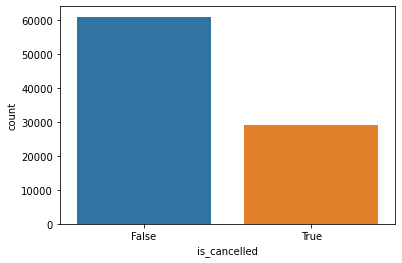

In [32]:
sns.countplot(data=df_allinfo, x='is_cancelled')
print(df_allinfo.shape)

In [33]:
df_allinfo.columns

Index(['reservation_id', 'is_cancelled', 'created_at', 'start_date',
       'start_date_months', 'end_date', 'user_id', 'sport_id', 'club_id',
       'club_name', 'city', 'country', 'num_players', 'price', 'currency',
       'payment_method', 'status', '_id', 'event_type', 'cancel_reason',
       'registration date', 'court id'],
      dtype='object')

## Number of reservations NO cancelled by country

In [34]:
df_play=df_allinfo[df_allinfo.is_cancelled == False]
df_play.head()

,reservation_id,is_cancelled,created_at,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,num_players,price,currency,payment_method,status,_id,event_type,cancel_reason,registration date,court id
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00+00:00,December,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b6f62a4d-e377-49a9,MATCH_CREATED,NaN,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,4e0b34f9-1722-439a,MATCH_CREATED,NaN,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,2911aa7d-6c10-470d,MATCH_CREATED,NaN,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00+00:00,December,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,DIRECT,ACTIVE,2d141150-c717-4b0b,MATCH_CREATED,NaN,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b486b958-fc36-4e69,MATCH_CREATED,NaN,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b


In [35]:
df_play.shape

(60995, 22)

## Number of reservations Cancelled by country

In [36]:
df_notplay=df_allinfo[df_allinfo.is_cancelled == True]
df_notplay.head()

,reservation_id,is_cancelled,created_at,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,num_players,price,currency,payment_method,status,_id,event_type,cancel_reason,registration date,court id
5,a93806ed-bd7a-4282,True,2021-11-30 08:15:40.032 UTC,2021-11-30 08:30:00+00:00,November,2021-11-30 09:30:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,4fedda90-c799-45d6,MATCH_CREATED,NaN,2021-11-30 08:16:40.032 UTC,e81aebfb-831b-4cdf
6,a93806ed-bd7a-4282,True,2021-11-30 08:15:40.032 UTC,2021-11-30 08:30:00+00:00,November,2021-11-30 09:30:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,4e053b31-e9b8-46c8,MATCH_CANCELED,CANCELED_BY_ADMIN,2021-11-30 08:16:40.032 UTC,e81aebfb-831b-4cdf
10,53099748-b941-4178,True,2021-11-30 14:55:59.433 UTC,2021-11-30 15:00:00+00:00,November,2021-11-30 17:00:00 UTC,IIIKGP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.2,DKK,WALLET,ACTIVE,6cdb8504-be92-4fae,MATCH_CREATED,NaN,2021-11-30 14:56:59.433 UTC,178252b1-8ddb-4958
11,53099748-b941-4178,True,2021-11-30 14:55:59.433 UTC,2021-11-30 15:00:00+00:00,November,2021-11-30 17:00:00 UTC,IIIKGP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.2,DKK,WALLET,ACTIVE,b202ebae-dd44-48aa,MATCH_CANCELED,CANCELED_BY_ADMIN,2021-11-30 14:56:59.433 UTC,178252b1-8ddb-4958
13,a6fcf99a-238f-4ca1,True,2022-01-21 19:26:13.84 UTC,2022-01-22 23:00:00+00:00,January,2022-01-23 00:00:00 UTC,CRGCMIM,TENNIS,bc8152b7-f04e-450e,Club el Padelito,...,2,1,MXN,CASH,INACTIVE,c7b0609f-fc80-4a13,MATCH_CREATED,NaN,2022-01-21 19:27:13.84 UTC,0dc79ab2-d12b-4347


## Distribution of number of reservations NO cancelled by country

(60995, 22)


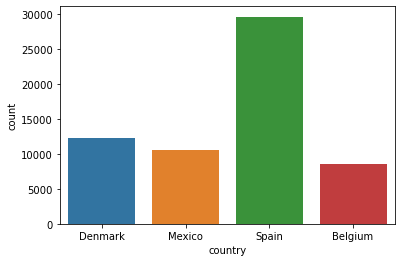

In [37]:
sns.countplot(data=df_play, x='country')
print(df_play.shape)

## Distribution of number of reservations Cancelled by country

(29246, 22)


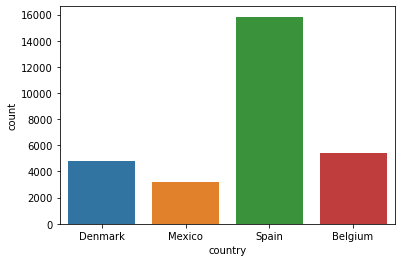

In [38]:
sns.countplot(data=df_notplay, x='country')
print(df_notplay.shape)

## Number of the active clubs per month

In [39]:
df_activeclubs= df_allinfo [df_allinfo["status"] == "ACTIVE"]

In [40]:
df_activeclubs.head()

,reservation_id,is_cancelled,created_at,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,num_players,price,currency,payment_method,status,_id,event_type,cancel_reason,registration date,court id
0,51aa13bc-e948-45c8,False,2021-11-30 14:32:33.347 UTC,2021-12-01 10:00:00+00:00,December,2021-12-01 11:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b6f62a4d-e377-49a9,MATCH_CREATED,NaN,2021-11-30 14:33:33.347 UTC,178252b1-8ddb-4958
1,77f6895d-5517-4b56,False,2021-11-30 12:59:02.796 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,4e0b34f9-1722-439a,MATCH_CREATED,NaN,2021-11-30 13:00:02.796 UTC,178252b1-8ddb-4958
2,d13d37f2-95f0-44be,False,2021-11-30 12:36:41.572 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,2911aa7d-6c10-470d,MATCH_CREATED,NaN,2021-11-30 12:37:41.572 UTC,25aa0e39-1060-4016
3,fa77ab2f-47a0-45b4,False,2021-12-01 07:57:03.56 UTC,2021-12-01 08:00:00+00:00,December,2021-12-01 09:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,DIRECT,ACTIVE,2d141150-c717-4b0b,MATCH_CREATED,NaN,2021-12-01 07:58:03.56 UTC,3cf02077-7566-4e7b
4,8ae07b0f-fdf8-4c25,False,2021-11-30 12:56:42.056 UTC,2021-11-30 13:00:00+00:00,November,2021-11-30 14:00:00 UTC,AKACGCP,PADEL,a328d271-7036-47b4,World of Padel,...,4,0.5,DKK,WALLET,ACTIVE,b486b958-fc36-4e69,MATCH_CREATED,NaN,2021-11-30 12:57:42.056 UTC,3cf02077-7566-4e7b


In [41]:
df_activem=df_activeclubs.groupby(["start_date_months"])["club_name"].count().sort_values()

In [42]:
df_activem

start_date_months
October     16302
November    18518
January     20208
December    21500
Name: club_name, dtype: int64

## Distribution of the number of reservation per club

(90241, 22)


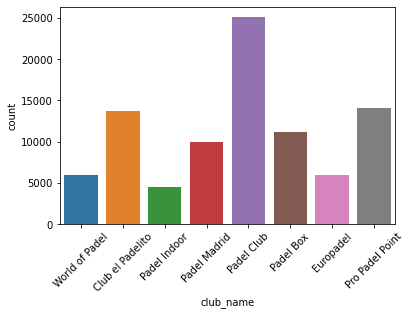

In [43]:
#plt.figure(figsize=(10,8))
chart=sns.countplot(data=df_allinfo, x='club_name')
chart.set_xticklabels(chart.get_xticklabels(),rotation =45)
print(df_allinfo.shape)

In [54]:
df_allinfo[df_allinfo.event_type == 'MATCH_PUBLISHED']

,reservation_id,is_cancelled,created_at,start_date,start_date_months,end_date,user_id,sport_id,club_id,club_name,...,num_players,price,currency,payment_method,status,_id,event_type,cancel_reason,registration date,court id


In [44]:
df_allinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90241 entries, 0 to 90240
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   reservation_id     90241 non-null  object             
 1   is_cancelled       90241 non-null  bool               
 2   created_at         90241 non-null  object             
 3   start_date         90241 non-null  datetime64[ns, UTC]
 4   start_date_months  90241 non-null  object             
 5   end_date           90241 non-null  object             
 6   user_id            90241 non-null  object             
 7   sport_id           90241 non-null  object             
 8   club_id            90241 non-null  object             
 9   club_name          90241 non-null  object             
 10  city               90241 non-null  object             
 11  country            90241 non-null  object             
 12  num_players        90241 non-null  int64      

## Reason for the cancellation 

In [45]:
df_allinfo.cancel_reason.unique()

array([nan, 'CANCELED_BY_ADMIN', 'CANCELED_BY_OWNER',
       'RESERVATION_WAS_CANCELED', 'CANCELED_BY_DELETE_CART_ITEM'],
      dtype=object)

#  With this file, I will continue the analysis in Power BI 

In [47]:
df_allinfo.to_csv("data_analyst_skills_test.csv")